In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read data set
df = pd.read_csv('D:\\ML\\bmw.csv') 
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


### Data Cleaning and EDA


In [5]:
df.info()  

<class 'pandas.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  str    
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  str    
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  str    
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), str(3)
memory usage: 758.2 KB


In [6]:
df.isnull()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
10776,False,False,False,False,False,False,False,False,False
10777,False,False,False,False,False,False,False,False,False
10778,False,False,False,False,False,False,False,False,False
10779,False,False,False,False,False,False,False,False,False


In [7]:
df = df.drop_duplicates()

In [8]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='str')

In [9]:
#feature engineering
#just to prevent errors and make data more usable and easy to analyze by ML models

df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fueltype', 'tax',
       'mpg', 'enginesize'],
      dtype='str')

### Data Visualization

<Axes: xlabel='year', ylabel='price'>

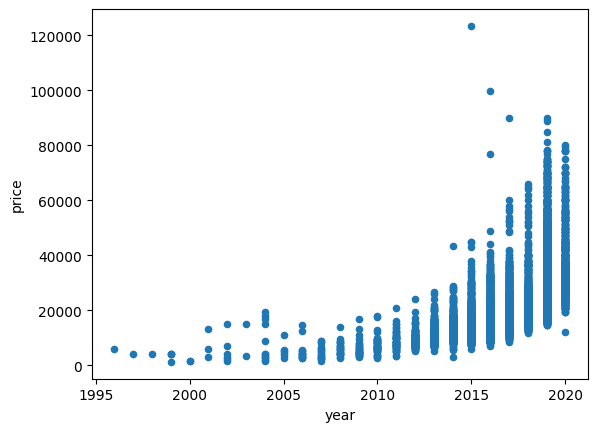

In [16]:
df.plot(kind= 'scatter', x= 'year' , y= 'price')  

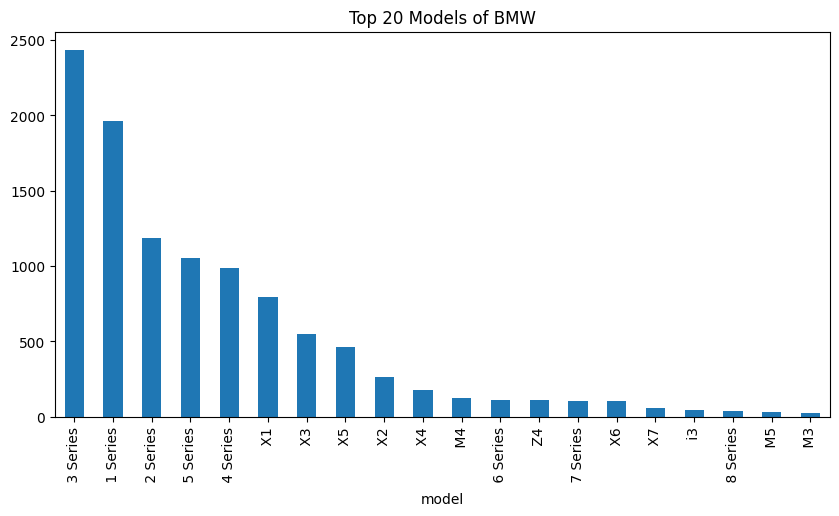

In [21]:
df['model'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title("Top 20 Models of BMW")
plt.show()

In [23]:
corr = df.corr(numeric_only=True)
corr

,year,price,mileage,tax,mpg,enginesize
year,1.000000,0.623754,-0.772761,0.025393,-0.070185,-0.022398
price,0.623754,1.000000,-0.605473,0.264178,-0.203986,0.461750
mileage,-0.772761,-0.605473,1.000000,-0.171236,0.117014,-0.006961
tax,0.025393,0.264178,-0.171236,1.000000,-0.351837,0.431361
mpg,-0.070185,-0.203986,0.117014,-0.351837,1.000000,-0.402058
enginesize,-0.022398,0.461750,-0.006961,0.431361,-0.402058,1.000000


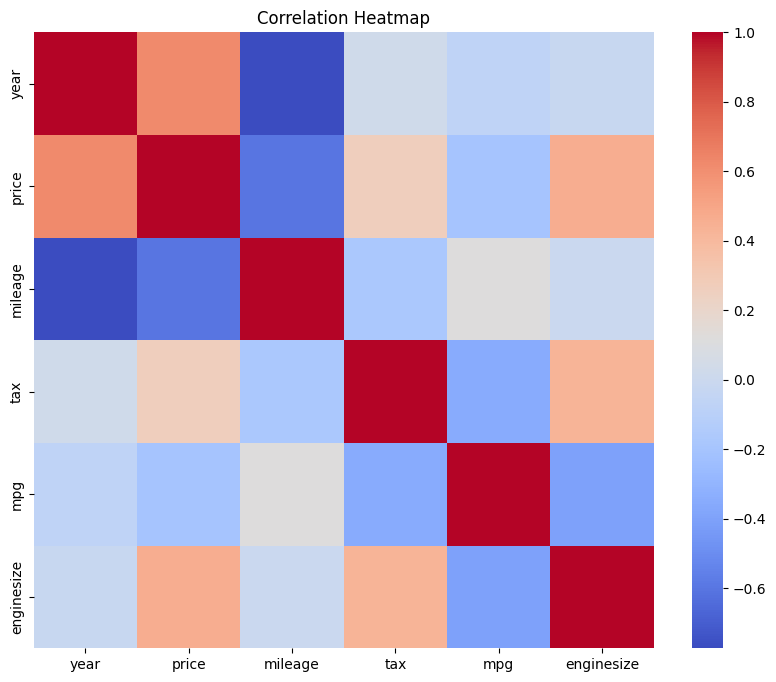

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()